<a href="https://colab.research.google.com/github/anas1IA/Analysis-of-Bank-Debit-Collections/blob/test_features/project_of_Analysis_of_Bank_Debit_Collections_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [5]:
data=pd.read_csv('bank_data.csv')
data

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


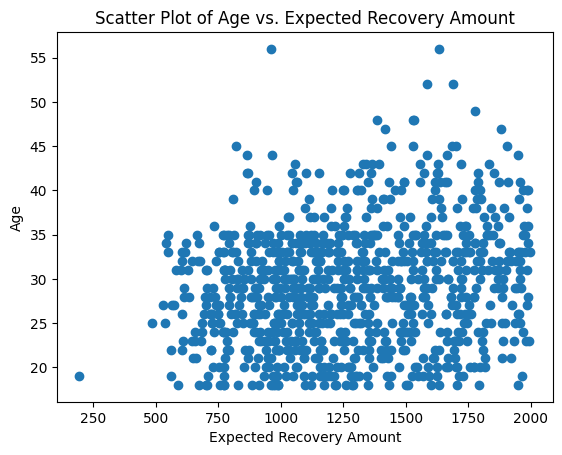

In [6]:
filtered_data = data[(data['expected_recovery_amount'] >= 0) & (data['expected_recovery_amount'] <= 2000)]
# Create a scatter plot of age vs. expected recovery amount
plt.scatter(filtered_data['expected_recovery_amount'], filtered_data['age'])
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.title('Scatter Plot of Age vs. Expected Recovery Amount')
plt.show()


In [7]:

'''If I have examined the scatter plot of age as a function of expected recovery amount for
the range of $0 to $2000 and I did not observe any obvious discontinuity or jump around the
$1000 threshold, it means that there is no clear visual evidence of
 a sudden change in the relationship between age
and expected recovery amount at that specific threshold.'''

'If I have examined the scatter plot of age as a function of expected recovery amount for\nthe range of $0 to $2000 and I did not observe any obvious discontinuity or jump around the\n$1000 threshold, it means that there is no clear visual evidence of\n a sudden change in the relationship between age\nand expected recovery amount at that specific threshold.'

In [8]:
#age vs. expected recovery amount
# 2. Subset the data
below_threshold = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] < 1000)]
above_threshold = data[(data['expected_recovery_amount'] >= 1000) & (data['expected_recovery_amount'] < 1100)]

# 3. Calculate the average age
average_age_below = below_threshold['age'].mean()
average_age_above = above_threshold['age'].mean()

# 4. Perform a t-test
t_statistic, p_value = ttest_ind(below_threshold['age'], above_threshold['age'])

# 5. Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the average age between the groups.")
else:
    print("There is no significant difference in the average age between the groups.")


There is no significant difference in the average age between the groups.


In [9]:
#If we prefer to use the Mann-Whitney U test , we obtain the same results
'''we want to be more cofident to conclude that differences
in the actual recovery amount are due to the higher
Recovery Strategy and not due to some other difference like age'''

'we want to be more cofident to conclude that differences\nin the actual recovery amount are due to the higher\nRecovery Strategy and not due to some other difference like age'

In [10]:
#sex vs. expected recovery amount

In [11]:
filtered_data = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)]

# Create a contingency table of sex vs. expected recovery amount
contingency_table = pd.crosstab(filtered_data['sex'], pd.cut(filtered_data['expected_recovery_amount'], [900, 1000, 1100]))

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Output the results
alpha = 0.05
if p_value < alpha:
    print("There is significant difference in the percentage of male customers across the $1000 threshold for expected recovery amount.")
else:
    print("There is no significant difference in the percentage of male customers across the $1000 threshold for expected recovery amount.")



There is no significant difference in the percentage of male customers across the $1000 threshold for expected recovery amount.


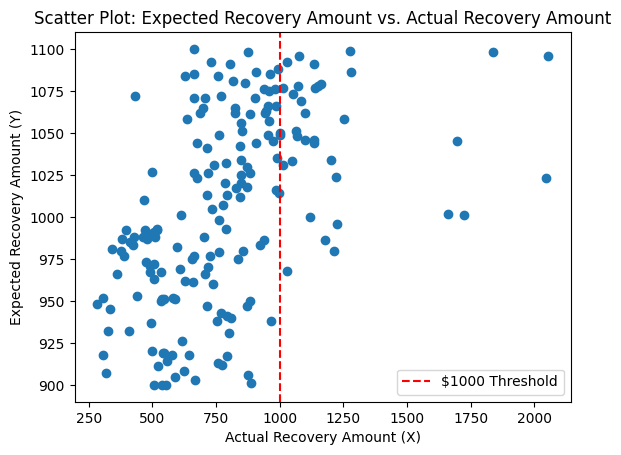

In [15]:

# Assuming your data has columns 'Expected_Recovery_Amount' and 'Actual_Recovery_Amount'
# Filter the data based on the expected recovery amount range ($900 to $1100)
filtered_data = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)]

# Create a scatter plot
plt.scatter(filtered_data['actual_recovery_amount'], filtered_data['expected_recovery_amount'])

# Add a vertical line at the $1000 threshold
plt.axvline(x=1000, color='red', linestyle='--', label='$1000 Threshold')

# Set plot labels and title
plt.xlabel('Actual Recovery Amount (X)')
plt.ylabel('Expected Recovery Amount (Y)')
plt.title('Scatter Plot: Expected Recovery Amount vs. Actual Recovery Amount')

# Add legend
plt.legend()

# Display the plot
plt.show()


In [13]:
# we don't see discontiuntiy (jump) in the last plot
#so we

In [16]:

from scipy.stats import kruskal
# Filter the data for the first window: Expected Recovery Amount $900 to $1100
window1_data = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)]
actual_recovery_window1 = window1_data['actual_recovery_amount']

# Filter the data for the second window: Expected Recovery Amount $950 to $1050
window2_data = data[(data['expected_recovery_amount'] >= 950) & (data['expected_recovery_amount'] <= 1050)]
actual_recovery_window2 = window2_data['actual_recovery_amount']

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(actual_recovery_window1, actual_recovery_window2)

# Print the results
print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check for statistical significance at a chosen alpha level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in actual recovery amounts between the two windows.")
else:
    print("There is no statistically significant difference in actual recovery amounts between the two windows.")


Kruskal-Wallis Test Statistic: 0.823820206138487
P-value: 0.36406558976551284
There is no statistically significant difference in actual recovery amounts between the two windows.
